In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [73]:
test = pd.read_csv("/content/USA_ALL_import_2020_allproduct.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
test.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,783976899,NaN,783976899,0
1,H4,2016,2016,2016,4,0,0,X,842,USA,...,166662,5,u,166662,NaN,NaN,424875770,NaN,424875770,0
2,H4,2016,2016,2016,6,1,0,X,842,USA,...,23272,5,u,23272,NaN,NaN,259143626,NaN,259143626,0
3,H4,2016,2016,2016,6,1,0,X,842,USA,...,126485,5,u,126485,NaN,NaN,158080955,NaN,158080955,0
4,H4,2016,2016,2016,6,1,0,X,842,USA,...,12533,5,u,12533,NaN,NaN,2839800,NaN,2839800,0


In [5]:
test.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

In [28]:
test['Commodity Code'].drop_duplicates()[0:-1].astype(int).sort_values()[0:100]

0            01
10234        01
86292        01
11910        01
15218        01
          ...  
5        010190
86297    010190
80730    010190
35099      0102
8698       0102
Name: Commodity Code, Length: 100, dtype: object

In [19]:
test2016 = test[['Commodity Code', 'Commodity', 'Trade Value (US$)']]

In [30]:
test.query('`Commodity Code`=="01"')

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,783976899,NaN,783976899,0
6490,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,129000,NaN,129000,0
8697,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,1984461,NaN,1984461,0
10234,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,34787,NaN,34787,0
11910,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,22312,NaN,22312,0
15218,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,2920037,NaN,2920037,0
18962,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,28591488,NaN,28591488,0
23989,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,160468,NaN,160468,0
26769,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,464067,NaN,464067,0
30492,H4,2016,2016,2016,2,0,0,X,842,USA,...,0,-1,NaN,0,NaN,NaN,331709,NaN,331709,0


In [34]:
test.iloc[0,:]

Classification                       H4
Year                               2016
Period                             2016
Period Desc.                       2016
Aggregate Level                       2
Is Leaf Code                          0
Trade Flow Code                       0
Trade Flow                            X
Reporter Code                       842
Reporter                            USA
Reporter ISO                        USA
Partner Code                          0
Partner                           World
Partner ISO                         W00
2nd Partner Code                      0
2nd Partner                       World
2nd Partner ISO                     W00
Customs Proc. Code                  C00
Customs                        All CPCs
Mode of Transport Code                0
Mode of Transport              All MOTs
Commodity Code                       01
Commodity                 Animals; live
Qty Unit Code                        -1
Qty Unit                            NaN


In [35]:
test.iloc[6490,:]

Classification                       H4
Year                               2016
Period                             2016
Period Desc.                       2016
Aggregate Level                       2
Is Leaf Code                          0
Trade Flow Code                       0
Trade Flow                            X
Reporter Code                       842
Reporter                            USA
Reporter ISO                        USA
Partner Code                          4
Partner                     Afghanistan
Partner ISO                         AFG
2nd Partner Code                      0
2nd Partner                       World
2nd Partner ISO                     W00
Customs Proc. Code                  C00
Customs                        All CPCs
Mode of Transport Code                0
Mode of Transport              All MOTs
Commodity Code                       01
Commodity                 Animals; live
Qty Unit Code                        -1
Qty Unit                            NaN


In [75]:
df = test.query('`Commodity Code`!="TOTAL"')
df = df.astype({'Commodity Code': 'int32'})
df = df.query('`Partner Code`==0').query('`Commodity Code`<100').sort_values(by = "Trade Value (US$)", ascending = False)[['Commodity Code', 'Commodity', 'Trade Value (US$)']].iloc[:10, ]
df

,Commodity Code,Commodity,Trade Value (US$)
5029,84,"Nuclear reactors, boilers, machinery and mecha...",361551454128
5631,85,Electrical machinery and equipment and parts t...,343474039898
5975,87,Vehicles; other than railway or tramway rollin...,254436751363
1945,30,Pharmaceutical products,139518097697
1269,27,"Mineral fuels, mineral oils and products of th...",130118461274
4241,71,"Natural, cultured pearls; precious, semi-preci...",104819659766
6587,99,Commodities not specified according to kind,102547452199
6124,90,"Optical, photographic, cinematographic, measur...",90870555532
6416,94,"Furniture; bedding, mattresses, mattress suppo...",65480039196
2339,39,Plastics and articles thereof,62464752374


In [48]:
df.dtypes

Classification             object
Year                        int64
Period                      int64
Period Desc.                int64
Aggregate Level             int64
Is Leaf Code                int64
Trade Flow Code             int64
Trade Flow                 object
Reporter Code               int64
Reporter                   object
Reporter ISO               object
Partner Code                int64
Partner                    object
Partner ISO                object
2nd Partner Code            int64
2nd Partner                object
2nd Partner ISO            object
Customs Proc. Code         object
Customs                    object
Mode of Transport Code      int64
Mode of Transport          object
Commodity Code              int32
Commodity                  object
Qty Unit Code               int64
Qty Unit                   object
Qty                         int64
Alt Qty Unit Code           int64
Alt Qty Unit               object
Alt Qty                     int64
Netweight (kg)

In [81]:
tradetop10 = pd.DataFrame()
for i in range(16, 21):
  for j in ["ex", "im"]:
    file = "/content/USA_ALL_{}port_20{}_allproduct.csv".format(j, str(i))
    df = pd.read_csv(file)
    df = df.query('`Commodity Code`!="TOTAL"')
    df = df.astype({'Commodity Code': 'int32'})
    df = df.query('`Partner Code`==0').query('`Commodity Code`<100').query('Commodity != "Commodities not specified according to kind"').sort_values(by = "Trade Value (US$)", ascending = False)[['Commodity Code', 'Commodity', 'Trade Value (US$)']].iloc[:10, ]
    df['Year'] = 2000+i
    df['type'] = j+"port"
    tradetop10 = pd.concat([tradetop10, df])


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [78]:
tradetop10.to_csv("tradetop10.csv")

In [82]:
tradetop10['Commodity_abbr'] = tradetop10['Commodity'].map(lambda x: x.split(" ")[0])
tradetop10.to_csv("tradetop101.csv")

In [101]:
trade = pd.read_csv("/tradetop10.csv")

In [84]:
trade.dtypes

Unnamed: 0             int64
Commodity Code         int64
Commodity             object
Trade Value (US$)    float64
Year                   int64
type                  object
Commodity_abbr        object
dtype: object

In [102]:
exp = trade.query('type == "export"').rename(columns = {'Trade Value (US$)': 'value', 'Commodity_abbr': 'name'})
imp = trade.query('type == "import"').rename(columns = {'Trade Value (US$)': 'value', 'Commodity_abbr': 'name'})

In [140]:
list(imp['name'].drop_duplicates())

['Electrical Machinery and Sound Recorders',
 'Nuclear Appliances',
 'Vehicles',
 'Minerals',
 'Pharmaceutical Products',
 'Optical Apparatus',
 'Gems and Metals',
 'Furniture',
 'Plastic Articles',
 'Organic Chemicals']

In [147]:
colors = dict(zip(
    list(exp['name'].drop_duplicates()),
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50', 'aquamarine', 'burlywood', 'pink']
))


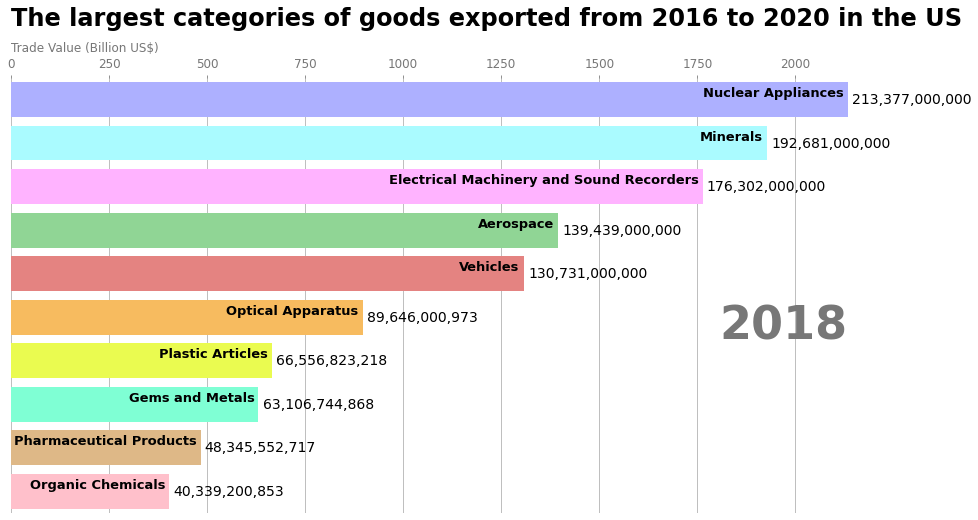

In [148]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    dff = exp[exp['Year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[x] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=13, weight=600, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles

    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Trade Value (Billion US$)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: int(x/100000000)))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The largest categories of goods exported from 2016 to 2020 in the US',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    #ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
    #        color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

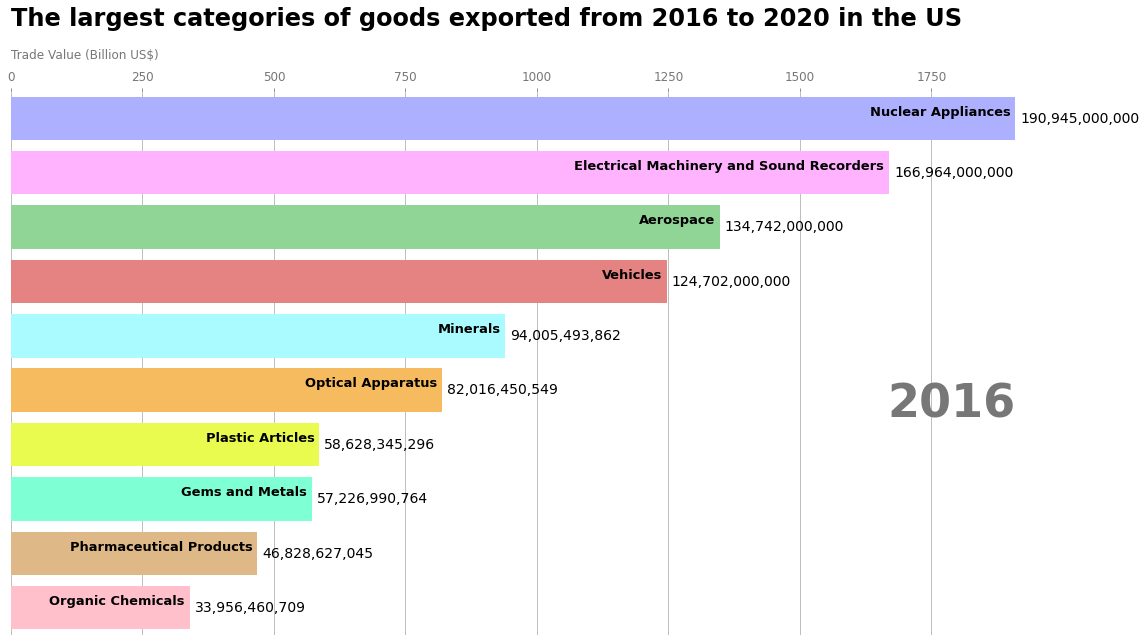

In [149]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(18, 10))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2016, 2021))
HTML(animator.to_jshtml()) 

In [150]:
with open("export.html", "w") as f:
    print(animator.to_jshtml(), file=f)